In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

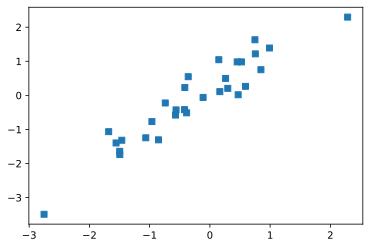

In [4]:
N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x, y, 's')
plt.show()

In [5]:
ANNreg = nn.Sequential(
    nn.Linear(1, 1), # input layer (number of inputs, number of outputs)
    nn.ReLU(), # activation function
    nn.Linear(1, 1) # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [6]:
learningRate = 0.05
lossFun = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

In [7]:
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    yhat = ANNreg(x) # forward pass

    loss = lossFun(yhat, y) # compute the loss
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad() # initialize gradients to zeros
    loss.backward()
    optimizer.step()

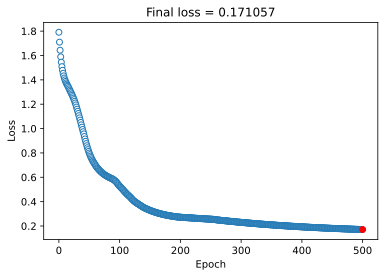

In [8]:
predictions = ANNreg(x)

testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(numepochs ,testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

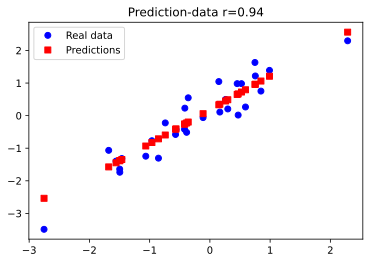

In [11]:
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
plt.title(f'Prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()